In [1]:
import numpy as np  # linear algebra
from sklearn import datasets
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [2]:
X = iris.data[:, :2]  # sepal width and sepal length
y = iris.target
steps = .002  # Spacing between values
i = [1, 3, 15]
split = [0.3, 0.1]

# Create color maps
backround = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
training_points = ListedColormap(['#a30b0b', '#089e08', '#006ea6'])


[[16  0  0]
 [ 0 10  4]
 [ 0  5 10]]


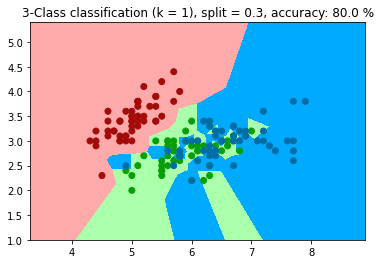

[[16  0  0]
 [ 0 11  3]
 [ 0  6  9]]


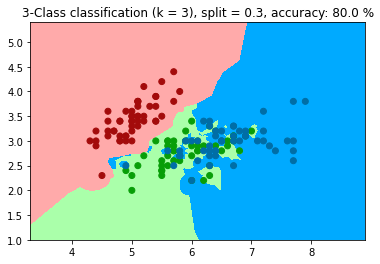

In [ ]:
for r in split:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=r, random_state=40)
    for x in i:
        neigh = KNeighborsClassifier(n_neighbors=x, weights='distance')
        neigh.fit(X_train, y_train)

        # calculate min, max and limits
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, steps),
                             np.arange(y_min, y_max, steps))

        # Put the result into a color plot
        pred = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
        pred = pred.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, pred, cmap=backround, shading='auto')

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=training_points)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        print(confusion_matrix(y_test, neigh.fit(X_train, y_train).predict(X_test)))
        plt.title(f"3-Class classification (k = {x}), split = {r}, accuracy: {round(neigh.score(X_test, y_test)*100, 2)} %")
        plt.show()

